In [2]:
%matplotlib inline
import pandas as pd
import seaborn as sbn
sbn.set()

In [3]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,Ashes of Kukulcan,2016
2,The Thousand Plane Raid,1969
3,Crucea de piatra,1993
4,The 86,2015


In [5]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### What are the ten most common movie names of all time?

In [25]:
titles.title.value_counts().head(10)

Hamlet                  19
Carmen                  14
Macbeth                 14
The Three Musketeers    12
The Outsider            11
Blood Money             11
She                     11
Maya                    11
Temptation              10
Victory                 10
dtype: int64

### Which three years of the 1930s saw the most films released?

In [30]:
titles[(titles.year//10 == 193)].year.value_counts().head(3)

1937    1186
1936    1130
1938    1117
dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

In [37]:
titles['decade'] = titles.year // 10 * 10
titles.head()

,title,year,decade
0,The Rising Son,1990,1990
1,Ashes of Kukulcan,2016,2010
2,The Thousand Plane Raid,1969,1960
3,Crucea de piatra,1993,1990
4,The 86,2015,2010


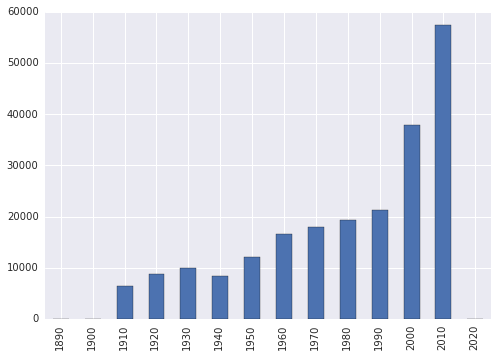

In [42]:
titles.decade.value_counts().sort_index().plot(kind='bar')

### Plot the number of "Hamlet" films made each decade.

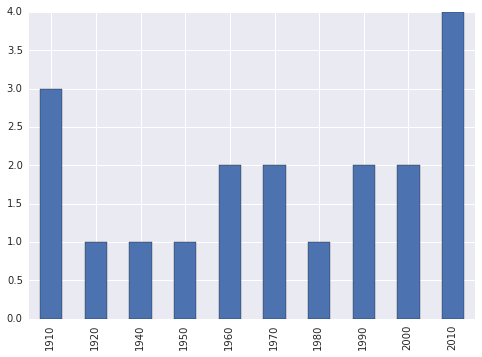

In [44]:
titles[titles.title == "Hamlet"].decade.value_counts().sort_index().plot('bar')

### Plot the number of "Rustler" characters in each decade of the history of film.

In [7]:
cast['decade'] = cast.year // 10 * 10

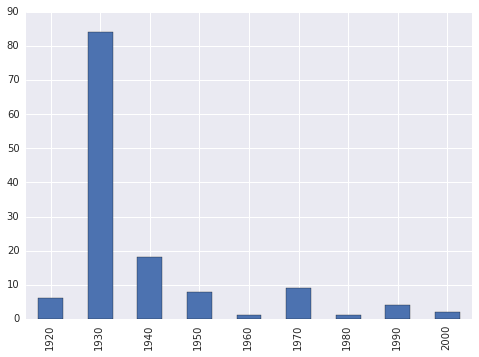

In [49]:
cast[cast.character == "Rustler"].decade.value_counts().sort_index().plot('bar')

### Plot the number of "Hamlet" characters each decade.

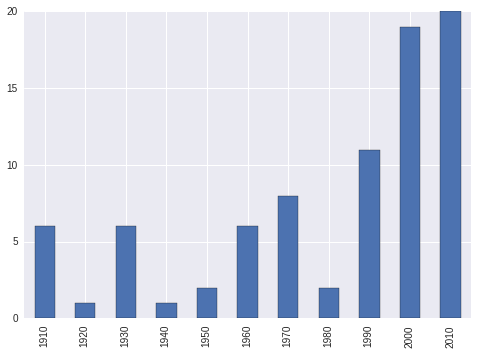

In [8]:
cast[cast.character == "Hamlet"].decade.value_counts().sort_index().plot('bar')

### What are the 11 most common character names in movie history?

In [13]:
cast.character.value_counts().head(11)

Himself        18916
Dancer         11076
Extra           9158
Reporter        7655
Doctor          6850
Policeman       6506
Student         6377
Bartender       6183
Nurse           6171
Party Guest     5923
Minor Role      5920
dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [16]:
cast[cast.character == "Herself"].name.value_counts().head(10)

Joyce Brothers         14
Queen Elizabeth II     11
Margaret Thatcher       8
Mary Jo Pehl            7
Joan Rivers             7
Lili?n Garc?a           6
Kareena Kapoor          5
Rekha                   5
Chris Evert             5
Sally Jessy Raphael     5
dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [17]:
cast[cast.character == "Himself"].name.value_counts().head(10)

Adolf Hitler             93
Richard Nixon            39
Ronald Reagan            31
John F. Kennedy          26
Ron Jeremy               24
Bill Clinton             20
Franklin D. Roosevelt    20
George W. Bush           20
Winston Churchill        20
Martin Luther King       19
dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [18]:
cast[cast.year == 1945].name.value_counts().head(10)

Emmett Vogan        39
Sam (II) Harris     30
Bess Flowers        28
Harold Miller       28
Nolan Leary         27
Frank O'Connor      26
Franklyn Farnum     25
Charles Sullivan    24
Tom London          24
Edmund Cobb         24
dtype: int64

### Which actors or actresses appeared in the most movies in the year 1985?

In [20]:
cast[cast.year == 1985].name.value_counts().head(10)

Mammootty           19
Shakti Kapoor       19
Sukumari            17
Lou Scheimer        15
Aruna Irani         14
Mohanlal            13
Deven Verma         13
Rajesh Khanna       13
Raj Babbar          13
Satyendra Kapoor    12
dtype: int64

### Plot how many roles Mammootty has played in each year of his career.

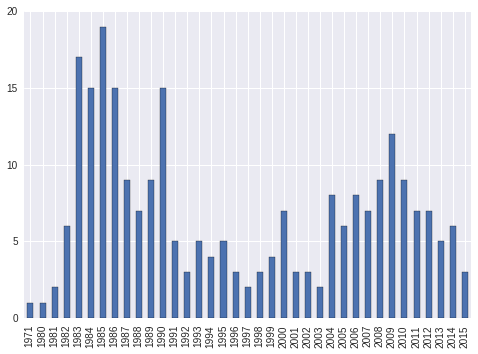

In [24]:
cast[cast.name == "Mammootty"].year.value_counts().sort_index().plot("bar")

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [25]:
cast[cast.character.str.startswith("Patron in")].character.value_counts().head(10)

Patron in Frisky Rabbit         16
Patron in Chinese Restaurant     9
Patron in the Coffee House       9
Patron in Billiard Parlor        5
Patron in Bar                    4
Patron in restaurant             3
Patron in Restaurant             3
Patron in cabaret                3
Patron in Club                   3
Patron in Coffee Shop            2
dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [53]:
cast[cast.character.str.startswith("Science")].character.value_counts().head(10)

Science Teacher         54
Science Fair Student     8
Science Student          8
Science Club Member      5
Science Reporter         5
Science Kid              4
Science Fair Judge       4
Science Promo Cadet      4
Science Fair Kid         3
Science Officer          3
dtype: int64

### Plot the n-values of the roles that Judi Dench has played over her career.

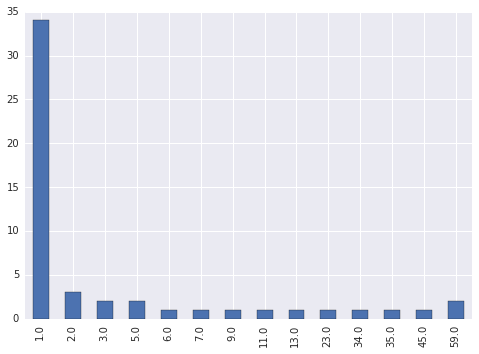

In [56]:
cast[cast.name == "Johnny Depp"].n.value_counts().sort_index().plot("bar")

In [62]:
c = cast[cast.name=="Judi Dench"]
d = c.groupby(['year','n']).size()
d = d.unstack('n')
d.fillna(' ')

n,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,12.0,13.0,16.0,18.0,20.0,23.0,26.0,29.0,40.0
year,,,,,,,,,,,,,,,,,,
1964,,,,,,,,,,1,,,,,,,,
1965,,2,,,,,,1,,,,,,,,,,
1968,,,,,,,,,,,,1,,,,,,
1974,,1,,,,,1,,,,,,,,,,,
1985,,,1,,,,1,,,,,,,,,,,
1987,,,2,,,,,,,,,,,,,,,
1988,,,,,,,,,,,1,,,,,,,
1989,,,,,,,,,,,,,,,,1,,
1995,,,1,,,1,,,,,,,,,,,,


In [ ]:
c.plot(kind="scatter",x='year',y='n',alpha=0.5)

### Plot the n-values of Cary Grant's roles through his career.

In [58]:
carygrant = cast[cast.name == "Cary Grant"]

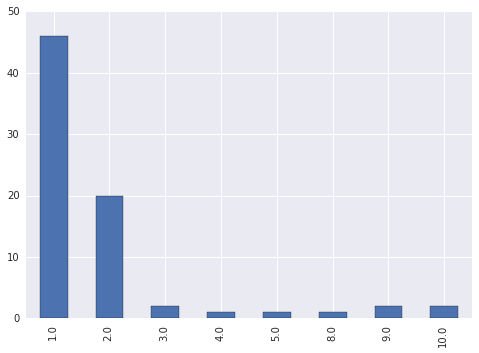

In [59]:
carygrant.n.value_counts().sort_index().plot("bar")

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

In [32]:
c = cast[cast.name == "Sidney Poitier"]
d = c.groupby(['year','n']).size()
d = d.unstack('n')
d.fillna(' ')

n,1.0,2.0,3.0,4.0,5.0,10.0,13.0,21.0
year,,,,,,,,
1950,,,,1,,,,
1951,,,1,,,,,
1952,,,,,1,,,
1954,,,1,,,,,
1955,,,,,,1,,
1956,,,,1,,,,
1957,,2,1,,,,1,
1958,,1,1,,,,,
1959,1,,,,,,,


### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [36]:
len(cast[(cast.n == 1) & (cast.type == 'actor') & (cast.decade == 1950)])

6389

In [37]:
len(cast[(cast.n == 1) & (cast.type == 'actress') & (cast.decade == 1950)])

2813

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [38]:
len(cast[(cast.n == 2) & (cast.type == 'actor') & (cast.decade == 1950)])

4382

In [40]:
len(cast[(cast.n == 2) & (cast.type == 'actress') & (cast.decade == 1950)])

4405

In [9]:
#cast.title.value_counts()
cast[cast.name == "Robert Redford"].title.value_counts()

Inside Daisy Clover                      2
The Company You Keep                     2
The Horse Whisperer                      1
Heretic                                  1
Legal Eagles                             1
A River Runs Through It                  1
The Clearing                             1
The Candidate                            1
Truth                                    1
Mickybo and Me                           1
The Chase                                1
Pete's Dragon                            1
Lions for Lambs                          1
Jeremiah Johnson                         1
Havana                                   1
The Hot Rock                             1
War Hunt                                 1
The Natural                              1
An Unfinished Life                       1
Little Fauss and Big Halsy               1
The Electric Horseman                    1
Tell Them Willie Boy Is Here             1
The Great Waldo Pepper                   1
The Great G

In [35]:
oneactor = cast.title.value_counts()[cast.title.value_counts() == 1]
redford_movies = cast[cast.name == "Robert Redford"].title
cast[cast.title.isin(redford_movies)].title.value_counts().tail(5)

Little Fauss and Big Halsy               11
War Hunt                                 11
Situation Hopeless... But Not Serious    10
Heretic                                   2
All Is Lost                               1
dtype: int64

In [19]:
for i in c.title:
    if i in oneactor:
        print(i)

All Is Lost


In [6]:
titles[titles.title == "Around the World in Eighty Days"]

,title,year
194246,Around the World in Eighty Days,1956


In [7]:
cast[(cast.title == "Around the World in Eighty Days") & (cast.n.isnull())]

,title,year,name,type,character,n
1332,Around the World in Eighty Days,1956,Abdullah Abbas,actor,Extra,NaN
1579,Around the World in Eighty Days,1956,Leo Abbey,actor,Extra,NaN
4491,Around the World in Eighty Days,1956,Charles Abraham,actor,Extra,NaN
6840,Around the World in Eighty Days,1956,Boyd Ackerman,actor,Extra,NaN
10372,Around the World in Eighty Days,1956,Jesse Adams,actor,Extra,NaN
15384,Around the World in Eighty Days,1956,George Agawa,actor,Extra,NaN
17553,Around the World in Eighty Days,1956,David Ahdar,actor,Extra,NaN
17791,Around the World in Eighty Days,1956,Richard Aherne,actor,Minor Role,NaN
18565,Around the World in Eighty Days,1956,Philip Ahn,actor,Hong Kong Citizen,NaN
19119,Around the World in Eighty Days,1956,Benny Ahuna,actor,Extra,NaN
